In [268]:
pip install config

Note: you may need to restart the kernel to use updated packages.


In [269]:
import joblib
import argparse
import pandas as pd
import numpy as np
import config
# import model_dispatcher
from sklearn import metrics
from sklearn import tree
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


In [270]:
train_values_df=pd.read_csv("../input/gorkha-earthquake/train_values.csv")
train_labels_df=pd.read_csv("../input/gorkha-earthquake/train_labels.csv")
    #replacing all the object values with numberical values 
train_values_df["land_surface_condition"]=train_values_df["land_surface_condition"].replace(["n", "o", "t"],[1,2,3])
train_values_df["foundation_type"]=train_values_df["foundation_type"].replace(["h","i", "r", "u", "w"],[1,2,3,4,5])
train_values_df["roof_type"]=train_values_df["roof_type"].replace(["n","q","x"],[1,2,3])
train_values_df["ground_floor_type"]=train_values_df["ground_floor_type"].replace(["f", "m", "v", "x", "z"],[1,2,3,4,5])
train_values_df["other_floor_type"]=train_values_df["other_floor_type"].replace(["j","q", "s", "x"],[1,2,3,4])
train_values_df["position"]=train_values_df["position"].replace(["j","o","s","t"],[1,2,3,4])
train_values_df["plan_configuration"]=train_values_df["plan_configuration"].replace(["a", "c", "d", "f","m", "n", "o", "q", "s", "u"],[1,2,3,4,5,6,7,8,9,10])
train_values_df["legal_ownership_status"]=train_values_df["legal_ownership_status"].replace(["a", "r", "v", "w"],[1,2,3,4])
train_values_df["labels"]=train_labels_df.damage_grade

In [271]:
test_values_df=pd.read_csv("../input/gorkha-earthquake/test_values.csv")

test_values_df["land_surface_condition"]=test_values_df["land_surface_condition"].replace(["n", "o", "t"],[1,2,3])
test_values_df["foundation_type"]=test_values_df["foundation_type"].replace(["h","i", "r", "u", "w"],[1,2,3,4,5])
test_values_df["roof_type"]=test_values_df["roof_type"].replace(["n","q","x"],[1,2,3])
test_values_df["ground_floor_type"]=test_values_df["ground_floor_type"].replace(["f", "m", "v", "x", "z"],[1,2,3,4,5])
test_values_df["other_floor_type"]=test_values_df["other_floor_type"].replace(["j","q", "s", "x"],[1,2,3,4])
test_values_df["position"]=test_values_df["position"].replace(["j","o","s","t"],[1,2,3,4])
test_values_df["plan_configuration"]=test_values_df["plan_configuration"].replace(["a", "c", "d", "f","m", "n", "o", "q", "s", "u"],[1,2,3,4,5,6,7,8,9,10])
test_values_df["legal_ownership_status"]=test_values_df["legal_ownership_status"].replace(["a", "r", "v", "w"],[1,2,3,4])
# train_values_df["labels"]=train_labels_df.damage_grade

In [272]:
test_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   land_surface_condition                  86868 non-null  int64
 9   foundation_type                         86868 non-null  int64
 10  roof_type                               86868 non-null  int64
 11  ground_floor_ty

In [273]:
train_values_df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,labels
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,2.695427,3.119036,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.696040,0.579154,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,3.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [274]:
train_labels_df.tail(5)

,building_id,damage_grade
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2
260600,747594,3


In [275]:
train_values_df.tail(4)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,labels
260597,669485,17,715,2060,2,0,6,5,3,3,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,3,3,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,3,3,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,1,3,...,0,0,0,0,0,0,0,0,0,3


**EDA**

In [276]:
# how many features and data-points ?
print('Number of data points: ', train_values_df.shape[0])
print('Number of data features: ', train_labels_df.shape[1])

Number of data points:  260601
Number of data features:  2


In [277]:
print('Columns: ', list(train_values_df.columns))
# titanic.head(2) # Print the 2 first /rows
print('Columns:',list(train_labels_df.columns))

Columns:  ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_

In [278]:
# Number of classes in the survived column
classes = train_values_df.labels.unique()
print('3rd grade damage: ', classes[0])
print('2rd grade damage: ', classes[1])
print('1st grade damage: ', classes[1])

3rd grade damage:  3
2rd grade damage:  2
1st grade damage:  2


In [279]:
train_values_df.count()

building_id                               260601
geo_level_1_id                            260601
geo_level_2_id                            260601
geo_level_3_id                            260601
count_floors_pre_eq                       260601
age                                       260601
area_percentage                           260601
height_percentage                         260601
land_surface_condition                    260601
foundation_type                           260601
roof_type                                 260601
ground_floor_type                         260601
other_floor_type                          260601
position                                  260601
plan_configuration                        260601
has_superstructure_adobe_mud              260601
has_superstructure_mud_mortar_stone       260601
has_superstructure_stone_flag             260601
has_superstructure_cement_mortar_stone    260601
has_superstructure_mud_mortar_brick       260601
has_superstructure_c

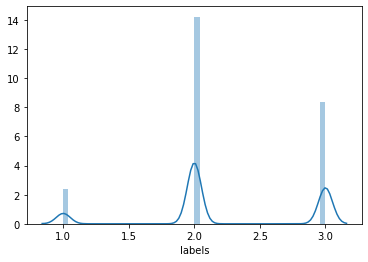

In [280]:
sns.distplot(train_values_df['labels'])


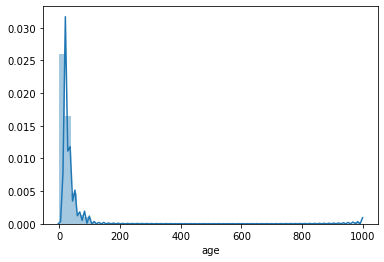

In [281]:
sns.distplot(train_values_df['age'])


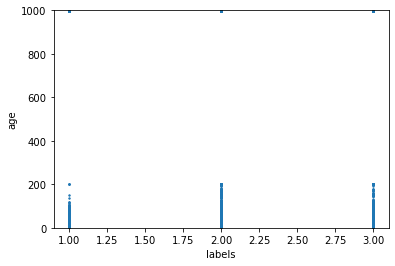

In [282]:
# first wo quickly view all the column names in the data
# print(df_train.columns)
# for above I could also use - data.columns
# Checking - 'GrLivArea'
data = pd.concat([train_values_df['labels'], train_values_df['age']], axis=1)
data.plot.scatter(x='labels', y='age', ylim=(0, 1000), s=2)

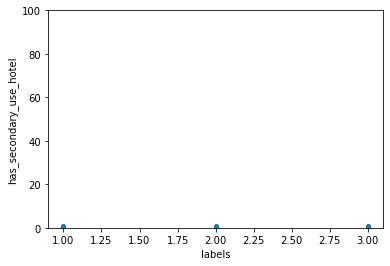

In [283]:
# has_secondary_use_hotel
data = pd.concat([train_values_df['labels'], train_values_df['has_secondary_use_hotel']], axis=1)
data.plot.scatter(x='labels', y='has_secondary_use_hotel', ylim=(0, 100), s=10)

(-0.5, 2.5, 10.0, 150.0)

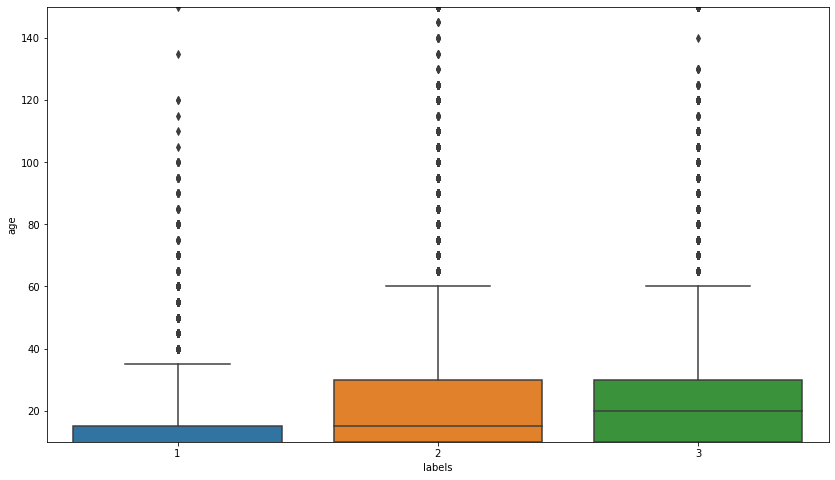

In [284]:
data = pd.concat([train_values_df['age'], train_values_df['labels']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='labels', y='age', data=data)
fig.axis(ymin= 10, ymax=150)

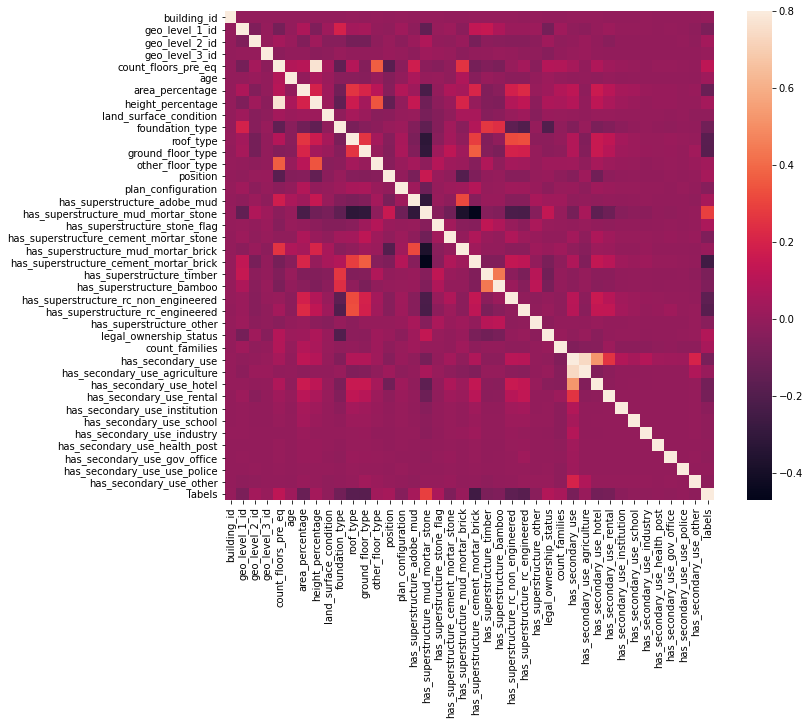

In [285]:
corr_mat = train_values_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

In [286]:
top_correlations = train_values_df.corr()
top_feature_columns = top_correlations['labels'][top_correlations['labels'].values > 0.1].index.values
top_feature_columns

array(['count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'labels'], dtype=object)

from the above analysis it is clear that those house build with mud mortar and stone are the once most affected
by the earthquake

In [287]:
train_target_label = train_values_df['labels']
# labels are dependent variables whose values are to be predicted. 
training_sample_df = train_values_df.drop(['labels'],axis=1);
# top_featue_columns_modified = to
test_sample_df=test_values_df;
training_sample_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,3,3,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,2,3,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,3,3,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,3,3,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,3,3,...,0,0,0,0,0,0,0,0,0,0


In [288]:
test_sample_df.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,3,3,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,3,3,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,3,3,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,3,3,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,3,3,...,0,0,0,0,0,0,0,0,0,0


In [289]:
scaler = StandardScaler()

# Again, during fit() the imputer learns about the mean, median etc of the data,
# which is then applied to the missing values during transform().
scaler.fit(training_sample_df)
scaler.fit(test_sample_df)

training_sample_df = scaler.transform(training_sample_df)
test_sample_df = scaler.transform(test_sample_df)

In [290]:
# Syntax of train_test_split
# X_train_split, X_test_split, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)
X_train_split, X_test_split, y_train, y_test = train_test_split(training_sample_df, train_target_label, random_state=42, train_size = 0.8 )

X_train_split.shape

(208480, 39)

In [291]:
print(X_test_split.shape,
training_sample_df.shape,
test_sample_df.shape)

(52121, 39) (260601, 39) (86868, 39)


In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [293]:
model = LinearRegression()
# we have to fit this model to our data, in other words, we have to make it “learn” using our training data.
# The syntax of the fit function is just plain model.fit(X_train_split, Y_train)
model.fit(training_sample_df, train_target_label)

LinearRegression()

In [294]:
print('Intercept is ', model.intercept_)

# For retrieving the slope (coefficient of x). This will be an array of values.
print("Slope i.e. coefficient of x is ", model.coef_)

Intercept is  2.2398795761286623
Slope i.e. coefficient of x is  [ 5.94895551e-04  7.51148448e-03 -1.59507296e-03  2.14995716e-03
  5.74912856e-02  1.25119793e-04 -1.91032849e-02 -1.11526493e-03
  3.94423000e-03 -3.68283048e-02  7.78635051e-04 -1.89767927e-02
  5.37621291e-03  2.31600868e-02  8.00006320e-04  4.51263510e-02
  1.26563638e-01  4.87372734e-02 -6.31789762e-03  3.20952692e-02
 -5.47649298e-02 -3.67437731e-02 -1.20860531e-02 -5.49556096e-02
 -7.20022620e-02 -1.44982800e-02  1.07253333e-02  2.42046797e-02
 -4.61106699e-02  2.87728513e-02  1.39657167e-02 -3.70049924e-03
 -8.26447539e-04  3.66249498e-03  4.92982816e-03 -4.53003304e-05
  1.83767435e-05  1.12845231e-03 -2.06547953e-03]


In [295]:
# regression = model.fit(training_sample_df, train_target_label)
print("Regression score is", model.score(training_sample_df, train_target_label))
print('train_target_label is ', train_target_label)

Regression score is 0.17203328791032868
train_target_label is  0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: labels, Length: 260601, dtype: int64


In [296]:
y_predict = model.predict(X_test_split)


In [297]:
rmse_simple_linear = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Square Error is ', rmse_simple_linear)

# MSE_Log
rmse_log_simple_linear = np.sqrt(mean_squared_log_error(y_test, y_predict))
print('Root Mean Square Log Error is ', rmse_log_simple_linear)

Root Mean Square Error is  0.5580372464717173
Root Mean Square Log Error is  0.18177570828765138


In [298]:
pred = model.predict(test_sample_df)
# print("Regression score on test sample data is", model.score(test_sample_df, train_target_label ))
testID = test_values_df['building_id']
predict_submission = pd.DataFrame()
predict_submission['building_id'] = testID
predict_submission['damage_grade'] = np.ceil(pred)
predict_submission['damage_grade'] = predict_submission['damage_grade'].astype(int)


In [299]:
predict_submission

,building_id,damage_grade
0,300051,3
1,99355,3
2,890251,3
3,745817,2
4,421793,3
...,...,...
86863,310028,3
86864,663567,3
86865,1049160,3
86866,442785,3


In [300]:
output = pd.DataFrame({'buliding_id': testID,
                       'damage_grade': predict_submission['damage_grade']})
output.to_csv('submission_ceil.csv', index=False)

In [301]:
pred = model.predict(test_sample_df)
# print("Regression score on test sample data is", model.score(test_sample_df, train_target_label ))
testID = test_values_df['building_id']
predict_submission = pd.DataFrame()
predict_submission['building_id'] = testID
predict_submission['damage_grade'] = np.floor(pred)
predict_submission['damage_grade'] = predict_submission['damage_grade'].astype(int)


In [ ]:
output = pd.DataFrame({'buliding_id': testID,
                       'damage_grade': predict_submission['damage_grade']})
output.to_csv('submission3.csv', index=False)

In [302]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(training_sample_df, train_target_label)
y_predict_ridge = model_ridge.predict(X_test_split)

mse_linear_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge))
print('MSE of Linear Ridge is ', mse_linear_ridge)

# Log Error
mse_log_linear_ridge = np.sqrt(mean_squared_log_error(y_test, y_predict_ridge))
print('MSE Log of Linear Ridge is ', mse_log_linear_ridge)

MSE of Linear Ridge is  0.5580372513654459
MSE Log of Linear Ridge is  0.18177571427521202


In [303]:
model_lasso = Lasso(alpha=33)
model_lasso.fit(training_sample_df, train_target_label)
y_predict_lasso = model_lasso.predict(X_test_split)

mse_linear_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso))
print('MSE of Lasso Regression is ', mse_linear_lasso)

# Log Error
mse_log_linear_lasso = np.sqrt(mean_squared_log_error(y_test, y_predict_lasso))
print('MSE Log of Lasso Regression is ', mse_log_linear_lasso)

MSE of Lasso Regression is  0.6153274325323872
MSE Log of Lasso Regression is  0.2032057613822495


In [304]:
RFR = RandomForestRegressor(max_depth=50)
RFR.fit(training_sample_df, train_target_label)

y_predict_random_forest = RFR.predict(X_test_split)

mse_random_forest = np.sqrt(metrics.mean_squared_error(y_test, y_predict_random_forest))
print('MSE Random Forest is ', mse_random_forest)

# Log Error
mse_log_random_forest = np.sqrt(mean_squared_log_error(y_test, y_predict_random_forest))
print('MSE Log Random Forest is ', mse_log_random_forest)

MSE Random Forest is  0.17084457012240903
MSE Log Random Forest is  0.05739961729079668


In [305]:
RFR_predict = RFR.predict(test_sample_df)

indexes = np.arange(test_values_df.shape[0]+2, 2*test_values_df.shape[0]+2)
print('Indexex ', indexes)
RFR_predict

Indexex  [ 86870  86871  86872 ... 173735 173736 173737]


array([2.84, 2.11, 2.17, ..., 2.21, 2.11, 1.34])

In [307]:

testID = test_values_df['building_id']
predict_submission = pd.DataFrame()
predict_submission['building_id'] = testID
predict_submission['damage_grade'] = RFR_predict.round() #for RFR HERE
predict_submission['damage_grade'] = predict_submission['damage_grade'].astype(int)
predict_submission

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [308]:
output = pd.DataFrame({'buliding_id': testID,
                       'damage_grade': predict_submission['damage_grade']})
output.to_csv('submission_RFR.csv', index=False)

In [309]:
feature_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=0.0, monotone_constraints='()',
             n_estimators=1250, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

# # feature_classifier = Pipeline(steps=[('feature_preprocessor', feature_preprocessor),
# #                       ('feature_model', feature_model)
# #                      ])

# # feature_X_train, feature_X_valid, feature_y_train, feature_y_test = train_test_split(X_feature_engineering, y, random_state=0)
# # feature_model.fit(training_sample_df, train_target_label)

feature_model.fit(training_sample_df, train_target_label)
feature_predictions = feature_model.predict(test_sample_df)

# Implementing our earlier custom defined function for RMSLE
# Root Mean Squared Log Error . This metric is used when the Target variable is converted into Log(Target).
# print('RMSLE from custom-defined function', root_mean_squared_log_error(feature_y_test, feature_predictions))

# # Implementing Scikit-learn function for RMSLE
# print('RMSLE using scikit-learn function', mean_squared_log_error(feature_y_test, feature_predictions))
print(feature_predictions)

[2.8708868 2.2542367 2.0998986 ... 2.1596136 2.2688522 1.5374215]


In [310]:
testID = test_values_df['building_id']
predict_submission = pd.DataFrame()
predict_submission['building_id'] = testID
predict_submission['damage_grade'] = feature_predictions.round()
predict_submission['damage_grade']=feature_predictions.astype(int) #XGBregressor
predict_submission


,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,1
4,421793,2
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [311]:
predict_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   building_id   86868 non-null  int64
 1   damage_grade  86868 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


In [312]:
output = pd.DataFrame({'buliding_id': testID,
                       'damage_grade': predict_submission['damage_grade']})
output.to_csv('submission_XGB.csv', index=False)